In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [8]:
dataset = pd.read_csv("D:\\Learnbay\\Stats & ML by Kumar Sundaram Sir\\Notes\\ML\\K-Nearest Neighbour(KNN)\\Classified Data",index_col =0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [10]:
dataset.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [15]:
dataset['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [17]:
# split the data into x and y
x = dataset.drop(['TARGET CLASS'],axis =1)
y = dataset['TARGET CLASS']

In [18]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [39]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=10,stratify=y)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 10) (250, 10) (750,) (250,)


## Building KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kNeighborsClassifier()

NameError: name 'kNeighborsClassifier' is not defined

## Select the best k value to decide " n_neighbors" basis error_rate

In [42]:
error_rate = []
for i in range(1,30):
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))
    
# Here instead of k =3/5/...
# we are going with avg of 30(1-30) values

In [43]:
error_rate

[0.096,
 0.116,
 0.072,
 0.08,
 0.076,
 0.072,
 0.072,
 0.072,
 0.06,
 0.056,
 0.056,
 0.068,
 0.068,
 0.072,
 0.064,
 0.064,
 0.064,
 0.056,
 0.06,
 0.056,
 0.064,
 0.064,
 0.064,
 0.068,
 0.064,
 0.06,
 0.064,
 0.064,
 0.06]

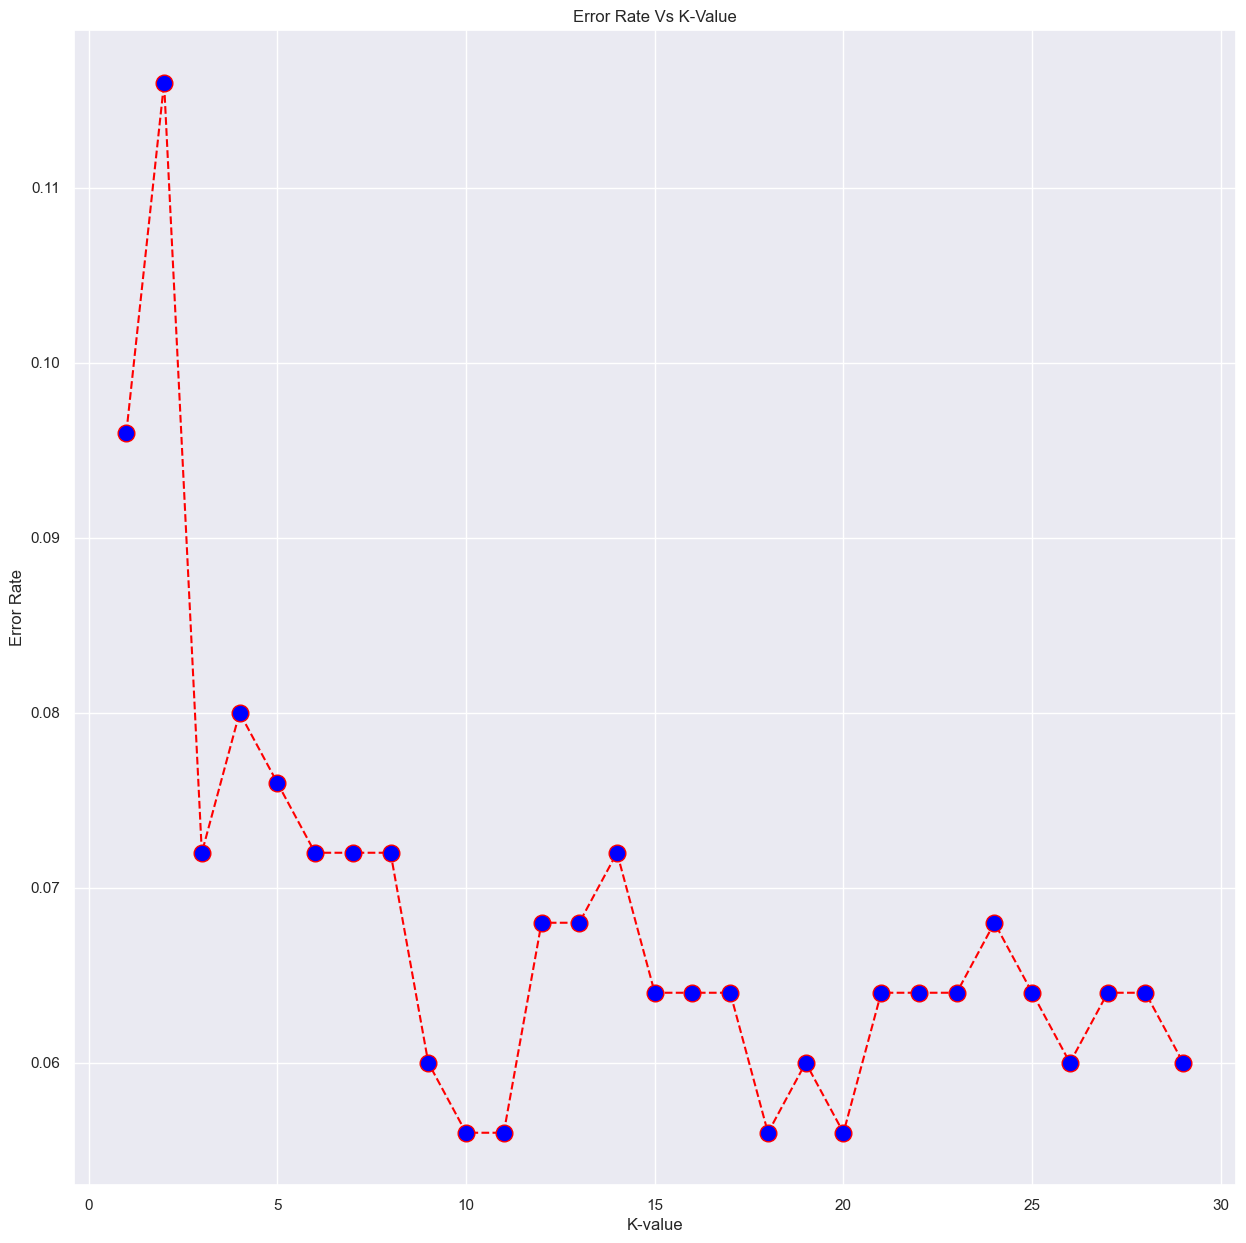

In [44]:
plt.figure(figsize = (15,15))
plt.plot(range(1,30),error_rate,color ='red',linestyle = 'dashed',marker = 'o',
        markersize =12,markerfacecolor='blue')
plt.title("Error Rate Vs K-Value")
plt.xlabel("K-value")
plt.ylabel("Error Rate")
plt.show()


In [45]:
# Range upto 50
error_rate = []
for i in range(1,50):
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))
    
# Here instead of k =3/5/...
# we are going with avg of 30(1-30) values

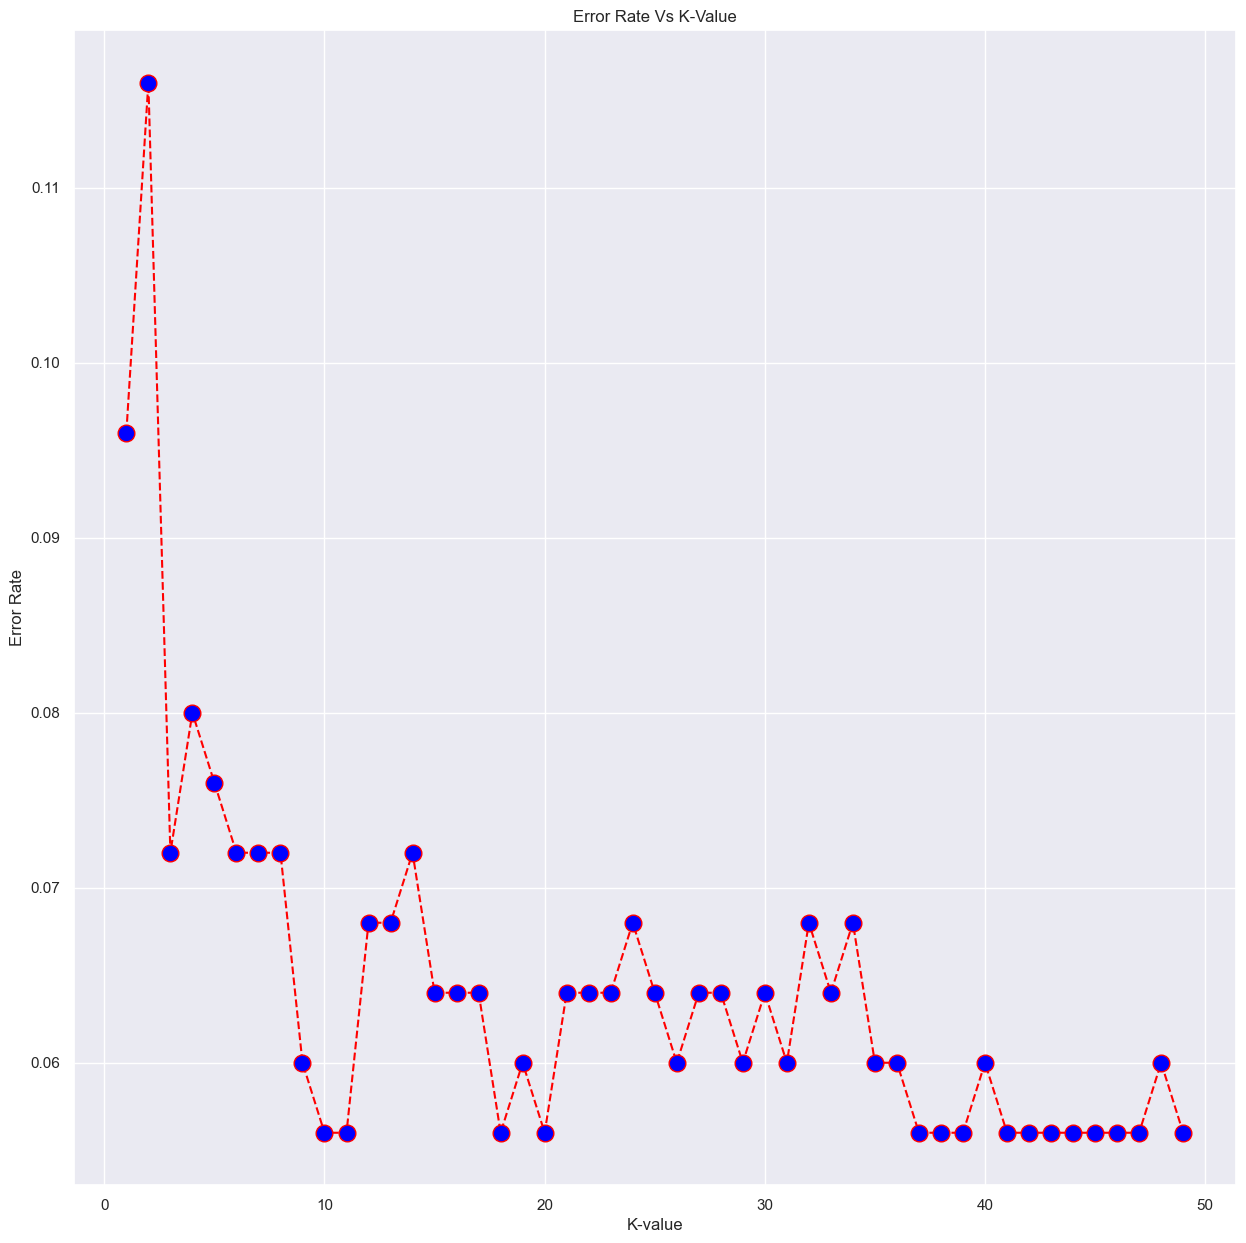

In [46]:
plt.figure(figsize = (15,15))
plt.plot(range(1,50),error_rate,color ='red',linestyle = 'dashed',marker = 'o',
        markersize =12,markerfacecolor='blue')
plt.title("Error Rate Vs K-Value")
plt.xlabel("K-value")
plt.ylabel("Error Rate")
plt.show()


In [47]:
knn = KNeighborsClassifier(n_neighbors = 11)
# we have to select least error rate in odd value
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [50]:
# Evaluate the model

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [51]:
print(confusion_matrix(y_train,y_pred_train))
print("***************************************")
print(confusion_matrix(y_test,y_pred_test))

[[345  30]
 [ 12 363]]
***************************************
[[117   8]
 [  6 119]]


In [52]:
print(classification_report(y_train,y_pred_train))
print("***************************************")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       375
           1       0.92      0.97      0.95       375

    accuracy                           0.94       750
   macro avg       0.95      0.94      0.94       750
weighted avg       0.95      0.94      0.94       750

***************************************
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       125
           1       0.94      0.95      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [55]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.944
***************************************
Testing Accuracy: 0.944


## Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [59]:
training_accuracy = cross_val_score(knn,x_train,y_train,cv=10)
test_accuracy = cross_val_score(knn,x_test,y_test,cv =10)
print(training_accuracy)
print(training_accuracy.mean())
print(training_accuracy.max())
print("*****************************************")
print(test_accuracy)
print(test_accuracy.mean())
print(test_accuracy.max())

[0.89333333 0.89333333 0.94666667 0.96       0.94666667 0.93333333
 0.96       0.98666667 0.94666667 0.93333333]
0.9400000000000001
0.9866666666666667
*****************************************
[0.92 0.96 0.92 1.   0.92 0.96 0.92 0.92 1.   0.96]
0.9480000000000001
1.0


# Support Vector Machine(SVM)

In [60]:
from sklearn.svm import SVC     #SVC-Support vector classification
# from sklearn.svm import SVR   # SVR -Support vector Regression

## kernel = 'linear'

In [61]:
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [62]:
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [63]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train_linear))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_linear))

Training Accuracy: 0.944
***************************************
Testing Accuracy: 0.948


## Kernel = 'sigmoid'

In [64]:
svm_sigmoid = SVC(kernel = 'sigmoid')
svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [66]:
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

In [67]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train_sigmoid))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_sigmoid))

Training Accuracy: 0.49866666666666665
***************************************
Testing Accuracy: 0.508


## Kernel = 'polynomial'

In [69]:
svm_poly =SVC(kernel = 'poly')
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [70]:
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

In [71]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train_poly))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_poly))

Training Accuracy: 0.9653333333333334
***************************************
Testing Accuracy: 0.916


## Kernel = 'rbf'

In [72]:
svm_rbf =SVC(kernel = 'rbf')
svm_rbf.fit(x_train,y_train)

SVC()

In [73]:
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [74]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train_rbf))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_rbf))

Training Accuracy: 0.9626666666666667
***************************************
Testing Accuracy: 0.952


## Regularization(C)

In [82]:
# Use Regularization method when we have overfitting or underfitting problem

svm_rbf =SVC(C=0.5,kernel = 'rbf')
svm_rbf.fit(x_train,y_train)

SVC(C=0.5)

In [83]:
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [84]:
print("Training Accuracy:",accuracy_score(y_train,y_pred_train_rbf))
print("***************************************")
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test_rbf))

# Here accuracy dropped, slightly change in overfitting pb

Training Accuracy: 0.956
***************************************
Testing Accuracy: 0.952
